In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt
import scipy.stats as st
import pprint
import pymc3 as pm
import theano as tt
plt.style.use('seaborn')
style = {
    'figure.figsize': (12, 8),
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'legend.fontsize': 14,
}
rcParams.update(style)

# Question 1

In [87]:
data = pd.read_csv('veteran.csv', index_col=0)
data['celltype'] = data['celltype'].astype('category')

In [88]:
data.head()

,trt,celltype,time,status,karno,diagtime,age,prior
1,1,squamous,72,1,60,7,69,0
2,1,squamous,411,1,70,5,64,10
3,1,squamous,228,1,60,3,38,0
4,1,squamous,126,1,60,9,63,10
5,1,squamous,118,1,70,11,65,10


In [89]:
uncensored = data[data['status'] == 1]

$$
\beta_i \sim \text{N}(0, 10)
$$
$$
\mu = \exp(\beta_0 + \beta_1 \text{trt} + \beta_2 \text{celltype} + \beta_3 \text{karno} + \beta_4 \text{diagtime} + \beta_5 \text{age} + \beta_6 \text{prior})
$$
$$
\alpha \sim \text{Gamma}(1.1, 1.1)
$$
$$
y \sim \text{Weibull}(1/\mu, \alpha)
$$

In [101]:
with pm.Model() as model:
    beta = pm.Normal('beta', 0, 10, shape=7)
    logmu = beta[0] + beta[1] * uncensored['trt'] + beta[2] * uncensored['celltype'].cat.codes + \
              beta[3] * uncensored['karno'] + beta[4] * uncensored['diagtime'] + \
              beta[5] * uncensored['age'] + beta[6] * uncensored['prior']

    lam = pm.Deterministic('lambda', 1/pm.math.exp(logmu))
    alpha = pm.Gamma('alpha', 1.1, 1.1)
#     right_censor = pm.Bound(pm.Weibull, lower=censtimes)('right_censored', alpha, lam)
    
    
    y = pm.Weibull('obs', alpha, lam, observed=uncensored['time'])

In [102]:
with model:
    wtrace = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/opt/conda/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_log__, beta]
  1%|▏         | 28/2000 [00:00<00:07, 279.15it/s]


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/opt/conda/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/opt/conda/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x7f9e89685e40, file "/...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/opt/conda/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7f9e89685e40, file "/...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/opt/conda/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         self.io_loop = ioloop.IOLoop.current()
    477         try:
--> 478             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    479         except KeyboardInterrupt:
    480             pass
    481 
    482 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    276         if self.control_stream:
    277             self.control_stream.on_recv(self.dispatch_control, copy=False)
    278 
    279         def make_dispatcher(stream):
    280             def dispatcher(msg):
--> 281                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    282             return dispatcher
    283 
    284         for s in self.shell_streams:
    285             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'with model:\n    wtrace = pm.sample(1000, tune=1000)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 17, 6, 0, 31, 84184, tzinfo=tzlocal()), 'msg_id': '57d46467f9c2fa6a3c068082f89871e9', 'msg_type': 'execute_request', 'session': '7deef8145670a7b64f64ef15eb6d004b', 'username': '', 'version': '5.2'}, 'metadata': {}, 'msg_id': '57d46467f9c2fa6a3c068082f89871e9', 'msg_type': 'execute_request', 'parent_header': {}})
    227             self.log.warn("Unknown message type: %r", msg_type)
    228         else:
    229             self.log.debug("%s: %s", msg_type, msg)
    230             self.pre_handler_hook()
    231             try:
--> 232                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'7deef8145670a7b64f64ef15eb6d004b']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'with model:\n    wtrace = pm.sample(1000, tune=1000)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 17, 6, 0, 31, 84184, tzinfo=tzlocal()), 'msg_id': '57d46467f9c2fa6a3c068082f89871e9', 'msg_type': 'execute_request', 'session': '7deef8145670a7b64f64ef15eb6d004b', 'username': '', 'version': '5.2'}, 'metadata': {}, 'msg_id': '57d46467f9c2fa6a3c068082f89871e9', 'msg_type': 'execute_request', 'parent_header': {}}
    233             except Exception:
    234                 self.log.error("Exception in message handler:", exc_info=True)
    235             finally:
    236                 self.post_handler_hook()

...........................................................................
/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'7deef8145670a7b64f64ef15eb6d004b'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'with model:\n    wtrace = pm.sample(1000, tune=1000)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 17, 6, 0, 31, 84184, tzinfo=tzlocal()), 'msg_id': '57d46467f9c2fa6a3c068082f89871e9', 'msg_type': 'execute_request', 'session': '7deef8145670a7b64f64ef15eb6d004b', 'username': '', 'version': '5.2'}, 'metadata': {}, 'msg_id': '57d46467f9c2fa6a3c068082f89871e9', 'msg_type': 'execute_request', 'parent_header': {}})
    392         if not silent:
    393             self.execution_count += 1
    394             self._publish_execute_input(code, parent, self.execution_count)
    395 
    396         reply_content = self.do_execute(code, silent, store_history,
--> 397                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    398 
    399         # Flush output before sending the reply.
    400         sys.stdout.flush()
    401         sys.stderr.flush()

...........................................................................
/opt/conda/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='with model:\n    wtrace = pm.sample(1000, tune=1000)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'with model:\n    wtrace = pm.sample(1000, tune=1000)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/opt/conda/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('with model:\n    wtrace = pm.sample(1000, tune=1000)',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('with model:\n    wtrace = pm.sample(1000, tune=1000)',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='with model:\n    wtrace = pm.sample(1000, tune=1000)', store_history=True, silent=False, shell_futures=True)
   2723                 self.displayhook.exec_result = result
   2724 
   2725                 # Execute the user code
   2726                 interactivity = "none" if silent else self.ast_node_interactivity
   2727                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2728                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2729                 
   2730                 self.last_execution_succeeded = not has_raised
   2731                 self.last_execution_result = result
   2732 

...........................................................................
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.With object>], cell_name='<ipython-input-102-ee5c152af9d8>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7f9e02e8bbe0, executi..._before_exec=None error_in_exec=None result=None>)
   2845 
   2846         try:
   2847             for i, node in enumerate(to_run_exec):
   2848                 mod = ast.Module([node])
   2849                 code = compiler(mod, cell_name, "exec")
-> 2850                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7f9e22db6ed0, file "<ipython-input-102-ee5c152af9d8>", line 1>
        result = <ExecutionResult object at 7f9e02e8bbe0, executi..._before_exec=None error_in_exec=None result=None>
   2851                     return True
   2852 
   2853             for i, node in enumerate(to_run_interactive):
   2854                 mod = ast.Interactive([node])

...........................................................................
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7f9e22db6ed0, file "<ipython-input-102-ee5c152af9d8>", line 1>, result=<ExecutionResult object at 7f9e02e8bbe0, executi..._before_exec=None error_in_exec=None result=None>)
   2905         outflag = True  # happens in more places, so it's easier as default
   2906         try:
   2907             try:
   2908                 self.hooks.pre_run_code_hook()
   2909                 #rprint('Running code', repr(code_obj)) # dbg
-> 2910                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7f9e22db6ed0, file "<ipython-input-102-ee5c152af9d8>", line 1>
        self.user_global_ns = {'In': ['', "get_ipython().run_line_magic('matplotlib', 'inli...  'legend.fontsize': 14,\n}\nrcParams.update(style)", "get_ipython().run_line_magic('matplotlib', 'inli...  'legend.fontsize': 14,\n}\nrcParams.update(style)", "data = pd.read_csv('veteran.csv', index_col=0)", "data['celltype'] = data['celltype'].astype('cate...'karno'] / 100\ndata['prior'] = data['prior'] / 10", "uncensored = data[data['status'] == 1]", "with pm.Model() as model:\n    b0 = pm.Normal('b0...l('obs', alpha, lam, observed=uncensored['time'])", r"data = pd.read_table('JawBoneData.txt', sep=',\s', names=['8', '8.5', '9', '9.5'])", "ages = np.array([8, 8.5, 9, 9.5])\nplt.plot(data.T)\nplt.xlabel('Age (yr)')\nplt.ylabel('Length (in)');", "with pm.Model() as model_1:\n    b0 = pm.Normal('...ike = pm.Normal('y', mu=mu, sd=sd, observed=data)", "with model_1:\n    trace_1 = pm.sample(5000, tune=1000, nuts_kwargs={'target_accept':.9})", 'pprint.pprint(pm.effective_n(trace_1))', "pm.plot_posterior(trace_1, ['b0', 'b1', 'sb', 'sw']);", "icc = trace_1['sb'] / (trace_1['sb'] + trace_1['...icc, bins='auto', normed=True)\nplt.xlabel('ICC');", "ppc = pm.sample_ppc(trace_1, samples=10000, mode...xlabel('Time (yr)')\nplt.ylabel(r'$\\hat{e}_{ij}$')", "with pm.Model() as model_2:\n    b0 = pm.Normal('...ike = pm.Normal('y', mu=mu, sd=sd, observed=data)", 'with model_2:\n    trace_2 = pm.sample(1000, tune=1000)', 'pprint.pprint(pm.effective_n(trace_2))', "pm.plot_posterior(trace_2, ['b0', 'b1', 's0', 's1']);", "growth_rate = trace_2['b1i'].mean(axis=0)\nfastes...} in/yr'.format(fastest, 2*growth_rate[fastest]))", ...], 'Out': {14: <matplotlib.text.Text object>, 20: <matplotlib.text.Text object>, 88:    trt  celltype  time  status  karno  diagtime ...uamous   118       1     70        11   65     10}, '_':    trt  celltype  time  status  karno  diagtime ...uamous   118       1     70        11   65     10, '_14': <matplotlib.text.Text object>, '_20': <matplotlib.text.Text object>, '_88':    trt  celltype  time  status  karno  diagtime ...uamous   118       1     70        11   65     10, '__': <matplotlib.text.Text object>, '___': <matplotlib.text.Text object>, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, ...}
        self.user_ns = {'In': ['', "get_ipython().run_line_magic('matplotlib', 'inli...  'legend.fontsize': 14,\n}\nrcParams.update(style)", "get_ipython().run_line_magic('matplotlib', 'inli...  'legend.fontsize': 14,\n}\nrcParams.update(style)", "data = pd.read_csv('veteran.csv', index_col=0)", "data['celltype'] = data['celltype'].astype('cate...'karno'] / 100\ndata['prior'] = data['prior'] / 10", "uncensored = data[data['status'] == 1]", "with pm.Model() as model:\n    b0 = pm.Normal('b0...l('obs', alpha, lam, observed=uncensored['time'])", r"data = pd.read_table('JawBoneData.txt', sep=',\s', names=['8', '8.5', '9', '9.5'])", "ages = np.array([8, 8.5, 9, 9.5])\nplt.plot(data.T)\nplt.xlabel('Age (yr)')\nplt.ylabel('Length (in)');", "with pm.Model() as model_1:\n    b0 = pm.Normal('...ike = pm.Normal('y', mu=mu, sd=sd, observed=data)", "with model_1:\n    trace_1 = pm.sample(5000, tune=1000, nuts_kwargs={'target_accept':.9})", 'pprint.pprint(pm.effective_n(trace_1))', "pm.plot_posterior(trace_1, ['b0', 'b1', 'sb', 'sw']);", "icc = trace_1['sb'] / (trace_1['sb'] + trace_1['...icc, bins='auto', normed=True)\nplt.xlabel('ICC');", "ppc = pm.sample_ppc(trace_1, samples=10000, mode...xlabel('Time (yr)')\nplt.ylabel(r'$\\hat{e}_{ij}$')", "with pm.Model() as model_2:\n    b0 = pm.Normal('...ike = pm.Normal('y', mu=mu, sd=sd, observed=data)", 'with model_2:\n    trace_2 = pm.sample(1000, tune=1000)', 'pprint.pprint(pm.effective_n(trace_2))', "pm.plot_posterior(trace_2, ['b0', 'b1', 's0', 's1']);", "growth_rate = trace_2['b1i'].mean(axis=0)\nfastes...} in/yr'.format(fastest, 2*growth_rate[fastest]))", ...], 'Out': {14: <matplotlib.text.Text object>, 20: <matplotlib.text.Text object>, 88:    trt  celltype  time  status  karno  diagtime ...uamous   118       1     70        11   65     10}, '_':    trt  celltype  time  status  karno  diagtime ...uamous   118       1     70        11   65     10, '_14': <matplotlib.text.Text object>, '_20': <matplotlib.text.Text object>, '_88':    trt  celltype  time  status  karno  diagtime ...uamous   118       1     70        11   65     10, '__': <matplotlib.text.Text object>, '___': <matplotlib.text.Text object>, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, ...}
   2911             finally:
   2912                 # Reset our crash handler in place
   2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:

...........................................................................
/home/jovyan/work/hw3/<ipython-input-102-ee5c152af9d8> in <module>()
      1 with model:
----> 2     wtrace = pm.sample(1000, tune=1000)

...........................................................................
/opt/conda/lib/python3.6/site-packages/pymc3/sampling.py in sample(draws=2000, step=<pymc3.step_methods.hmc.nuts.NUTS object>, init='auto', n_init=200000, start=[{'alpha_log__': array(-0.60199683), 'beta': array([-0.2394698 ,  0.56735866, -0.69179834,  0...9,  0.78597727,
        0.95478499, -0.44201529])}, {'alpha_log__': array(0.08606948), 'beta': array([-0.82881117, -0.30133495, -0.98788482,  0...8,  0.50913778,
       -0.84383329,  0.77587328])}, {'alpha_log__': array(0.62220985), 'beta': array([ 0.20907515,  0.49953079, -0.33936116,  0...2, -0.6866153 ,
       -0.91670315,  0.58194999])}, {'alpha_log__': array(0.77723336), 'beta': array([-0.39714157, -0.85416606, -0.19581448, -0...1,  0.94586392,
        0.25743053,  0.94205338])}], trace=None, chain_idx=0, chains=4, njobs=4, tune=1000, nuts_kwargs=None, step_kwargs=None, progressbar=True, model=<pymc3.model.Model object>, random_seed=[792406217, 206941169, 382677304, 803048832], live_plot=False, discard_tuned_samples=True, live_plot_kwargs=None, compute_convergence_checks=True, **kwargs={})
    414     parallel = njobs > 1 and chains > 1 and not has_population_samplers
    415     if parallel:
    416         _log.info('Multiprocess sampling ({} chains in {} jobs)'.format(chains, njobs))
    417         _print_step_hierarchy(step)
    418         try:
--> 419             trace = _mp_sample(**sample_args)
        trace = None
        sample_args = {'chain': 0, 'chains': 4, 'draws': 2000, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'njobs': 4, 'progressbar': True, 'random_seed': [792406217, 206941169, 382677304, 803048832], 'start': [{'alpha_log__': array(-0.60199683), 'beta': array([-0.2394698 ,  0.56735866, -0.69179834,  0...9,  0.78597727,
        0.95478499, -0.44201529])}, {'alpha_log__': array(0.08606948), 'beta': array([-0.82881117, -0.30133495, -0.98788482,  0...8,  0.50913778,
       -0.84383329,  0.77587328])}, {'alpha_log__': array(0.62220985), 'beta': array([ 0.20907515,  0.49953079, -0.33936116,  0...2, -0.6866153 ,
       -0.91670315,  0.58194999])}, {'alpha_log__': array(0.77723336), 'beta': array([-0.39714157, -0.85416606, -0.19581448, -0...1,  0.94586392,
        0.25743053,  0.94205338])}], ...}
    420         except pickle.PickleError:
    421             _log.warn("Could not pickle model, sampling singlethreaded.")
    422             _log.debug('Pickling error:', exec_info=True)
    423             parallel = False

...........................................................................
/opt/conda/lib/python3.6/site-packages/pymc3/sampling.py in _mp_sample(**kwargs={'draws': 2000, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'step': <pymc3.step_methods.hmc.nuts.NUTS object>, 'trace': None, 'tune': 1000})
    944 
    945     chain_nums = list(range(chain, chain + chains))
    946     pbars = [kwargs.pop('progressbar')] + [False] * (chains - 1)
    947     jobs = (delayed(_sample)(*args, **kwargs)
    948             for args in zip(chain_nums, pbars, rseed, start))
--> 949     traces = Parallel(n_jobs=njobs)(jobs)
        traces = undefined
        njobs = 4
        jobs = <generator object _mp_sample.<locals>.<genexpr>>
    950     return MultiTrace(traces)
    951 
    952 
    953 def stop_tuning(step):

...........................................................................
/opt/conda/lib/python3.6/site-packages/joblib/parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object _mp_sample.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Tue Apr 17 06:00:33 2018
PID: 10221                              Python 3.6.3: /opt/conda/bin/python
...........................................................................
/opt/conda/lib/python3.6/site-packages/joblib/parallel.py in __call__(self=<joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _sample>, (0, True, 792406217, {'alpha_log__': array(-0.60199683), 'beta': array([-0.2394698 ,  0.56735866, -0.69179834,  0...9,  0.78597727,
        0.95478499, -0.44201529])}), {'draws': 2000, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'step': <pymc3.step_methods.hmc.nuts.NUTS object>, 'trace': None, 'tune': 1000})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/opt/conda/lib/python3.6/site-packages/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _sample>
        args = (0, True, 792406217, {'alpha_log__': array(-0.60199683), 'beta': array([-0.2394698 ,  0.56735866, -0.69179834,  0...9,  0.78597727,
        0.95478499, -0.44201529])})
        kwargs = {'draws': 2000, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'step': <pymc3.step_methods.hmc.nuts.NUTS object>, 'trace': None, 'tune': 1000}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/opt/conda/lib/python3.6/site-packages/pymc3/sampling.py in _sample(chain=0, progressbar=True, random_seed=792406217, start={'alpha_log__': array(-0.60199683), 'beta': array([-0.2394698 ,  0.56735866, -0.69179834,  0...9,  0.78597727,
        0.95478499, -0.44201529])}, draws=2000, step=<pymc3.step_methods.hmc.nuts.NUTS object>, trace=None, tune=1000, model=<pymc3.model.Model object>, live_plot=False, live_plot_kwargs=None, **kwargs={})
    521                             tune, model, random_seed)
    522     if progressbar:
    523         sampling = tqdm(sampling, total=draws)
    524     try:
    525         strace = None
--> 526         for it, strace in enumerate(sampling):
        it = 102
        strace = <pymc3.backends.ndarray.NDArray object>
        sampling =   1%|▏         | 28/2000 [00:00<00:11, 175.63it/s]
    527             if live_plot:
    528                 if live_plot_kwargs is None:
    529                     live_plot_kwargs = {}
    530                 if it >= skip_first:

...........................................................................
/opt/conda/lib/python3.6/site-packages/tqdm/_tqdm.py in __iter__(self=  1%|▏         | 28/2000 [00:00<00:11, 175.48it/s])
    936             except AttributeError:
    937                 raise TqdmDeprecationWarning("""\
    938 Please use `tqdm_gui(...)` instead of `tqdm(..., gui=True)`
    939 """, fp_write=getattr(self.fp, 'write', sys.stderr.write))
    940 
--> 941             for obj in iterable:
        obj = <pymc3.backends.ndarray.NDArray object>
        iterable = <generator object _iter_sample>
    942                 yield obj
    943                 # Update and possibly print the progressbar.
    944                 # Note: does not call self.update(1) for speed optimisation.
    945                 n += 1

...........................................................................
/opt/conda/lib/python3.6/site-packages/pymc3/sampling.py in _iter_sample(draws=2000, step=<pymc3.step_methods.hmc.nuts.NUTS object>, start={'alpha_log__': array(-0.60199683), 'beta': array([-0.2394698 ,  0.56735866, -0.69179834,  0...9,  0.78597727,
        0.95478499, -0.44201529])}, trace=None, chain=0, tune=1000, model=<pymc3.model.Model object>, random_seed=792406217)
    619         step.tune = bool(tune)
    620         for i in range(draws):
    621             if i == tune:
    622                 step = stop_tuning(step)
    623             if step.generates_stats:
--> 624                 point, states = step.step(point)
        point = {'alpha_log__': array(-0.60199683), 'beta': array([-0.2394698 ,  0.56735866, -0.69179834,  0...9,  0.78597727,
        0.95478499, -0.44201529])}
        states = [{'depth': 2, 'diverging': True, 'energy': 1.5161379718361465e+33, 'energy_error': 0.0, 'max_energy_error': 5.764607523034235e+17, 'mean_tree_accept': 0.6666666666666666, 'step_size': 9.695221462046567e-27, 'step_size_bar': 8.839968787714118e-27, 'tree_size': 3, 'tune': True}]
        step.step = <bound method GradientSharedStep.step of <pymc3.step_methods.hmc.nuts.NUTS object>>
    625                 if strace.supports_sampler_stats:
    626                     strace.record(point, states)
    627                 else:
    628                     strace.record(point)

...........................................................................
/opt/conda/lib/python3.6/site-packages/pymc3/step_methods/arraystep.py in step(self=<pymc3.step_methods.hmc.nuts.NUTS object>, point={'alpha_log__': array(-0.60199683), 'beta': array([-0.2394698 ,  0.56735866, -0.69179834,  0...9,  0.78597727,
        0.95478499, -0.44201529])})
    217     def step(self, point):
    218         self._logp_dlogp_func.set_extra_values(point)
    219         array = self._logp_dlogp_func.dict_to_array(point)
    220 
    221         if self.generates_stats:
--> 222             apoint, stats = self.astep(array)
        apoint = undefined
        stats = undefined
        self.astep = <bound method BaseHMC.astep of <pymc3.step_methods.hmc.nuts.NUTS object>>
        array = array([-0.60199683, -0.2394698 ,  0.56735866, -0...9,
        0.78597727,  0.95478499, -0.44201529])
    223             point = self._logp_dlogp_func.array_to_full_dict(apoint)
    224             return point, stats
    225         else:
    226             apoint = self.astep(array)

...........................................................................
/opt/conda/lib/python3.6/site-packages/pymc3/step_methods/hmc/base_hmc.py in astep(self=<pymc3.step_methods.hmc.nuts.NUTS object>, q0=array([-0.60199683, -0.2394698 ,  0.56735866, -0...9,
        0.78597727,  0.95478499, -0.44201529]))
    110         """Perform a single HMC iteration."""
    111         p0 = self.potential.random()
    112         start = self.integrator.compute_state(q0, p0)
    113 
    114         if not np.isfinite(start.energy):
--> 115             self.potential.raise_ok()
        self.potential.raise_ok = <bound method QuadPotentialDiagAdapt.raise_ok of...hmc.quadpotential.QuadPotentialDiagAdapt object>>
    116             raise ValueError('Bad initial energy: %s. The model '
    117                              'might be misspecified.' % start.energy)
    118 
    119         adapt_step = self.tune and self.adapt_step_size

...........................................................................
/opt/conda/lib/python3.6/site-packages/pymc3/step_methods/hmc/quadpotential.py in raise_ok(self=<pymc3.step_methods.hmc.quadpotential.QuadPotentialDiagAdapt object>)
    185 
    186         self._n_samples += 1
    187 
    188     def raise_ok(self):
    189         if np.any(self._stds == 0):
--> 190             raise ValueError('Mass matrix contains zeros on the diagonal. '
    191                              'Some derivatives might always be zero.')
    192         if np.any(self._stds < 0):
    193             raise ValueError('Mass matrix contains negative values on the '
    194                              'diagonal.')

ValueError: Mass matrix contains zeros on the diagonal. Some derivatives might always be zero.
___________________________________________________________________________

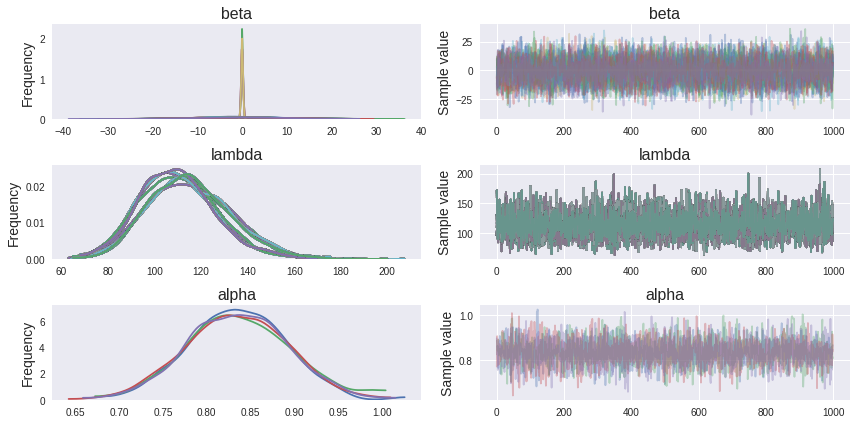

In [96]:
pm.traceplot(wtrace);

In [ ]:
ppc = pm.sample_ppc(wtrace, 1000, model)
plt.plot(uncensored['age'], ppc['obs'].mean(axis=0), 'o')

# Question 2

In [7]:
data = pd.read_table('JawBoneData.txt', sep=',\s', names=['8', '8.5', '9', '9.5'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


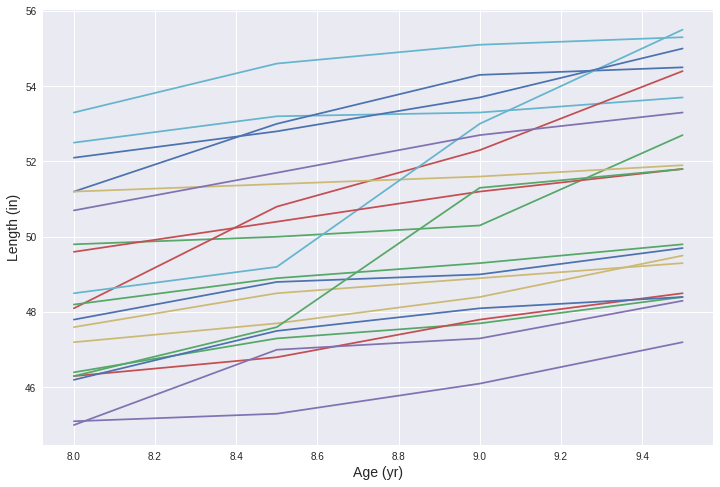

In [8]:
ages = np.array([8, 8.5, 9, 9.5])
plt.plot(data.T)
plt.xlabel('Age (yr)')
plt.ylabel('Length (in)');

#### 2.a
For the variances I use half-cauchy distribution because of Gelman recommendation; it is limited to (0,$\infty$) and has only one parameter for scale.

In [9]:
with pm.Model() as model_1:
    b0 = pm.Normal('b0', 0, 100)
    b1 = pm.Normal('b1', 0, 100)
    sb = pm.HalfCauchy('sb', 100)
    sw = pm.HalfCauchy('sw', 100)
    
    z = pm.Normal('z', 0, sb, shape=(20,1))
    
    mu = b0 + b1 * ages + z
    sd = sw
    like = pm.Normal('y', mu=mu, sd=sd, observed=data)

In [10]:
with model_1:
    trace_1 = pm.sample(5000, tune=1000, nuts_kwargs={'target_accept':.9})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/opt/conda/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, sw_log__, sb_log__, b1, b0]
  5%|▌         | 305/6000 [00:08<02:34, 36.77it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '6382' (I am process '6383')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/jovyan/.theano/compiledir_Linux-4.9-linuxkit-aufs-x86_64-with-debian-stretch-sid-x86_64-3.6.3-64/lock_dir
100%|██████████| 6000/6000 [01:08<00:00, 87.79it/s]
The number of effective samples is smaller than 25% for some parameters.


In [11]:
pprint.pprint(pm.effective_n(trace_1))

{'b0': 5004.0,
 'b1': 6588.0,
 'sb': 9825.0,
 'sw': 8856.0,
 'z': array([[2671.],
       [2788.],
       [2610.],
       [2644.],
       [2632.],
       [2732.],
       [2663.],
       [2686.],
       [2701.],
       [2620.],
       [2683.],
       [2611.],
       [2658.],
       [2682.],
       [2673.],
       [2698.],
       [2621.],
       [2611.],
       [2650.],
       [2675.]])}


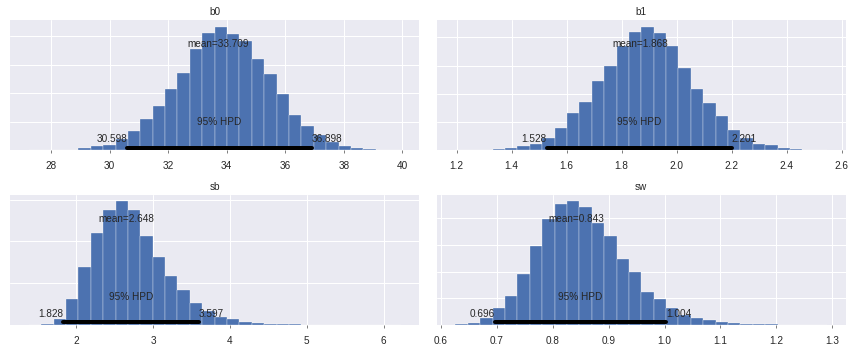

In [12]:
pm.plot_posterior(trace_1, ['b0', 'b1', 'sb', 'sw']);

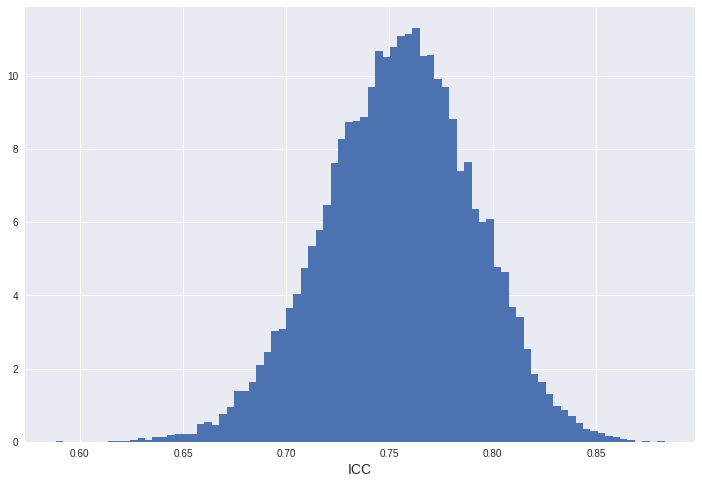

In [13]:
icc = trace_1['sb'] / (trace_1['sb'] + trace_1['sw'])
plt.hist(icc, bins='auto', normed=True)
plt.xlabel('ICC');

The above shows that the variance between kids accounts for about 75% of the variance, which implies that around 25% of the variances is from within kid measurements. So measurements on the same child should be generally more consistent.

100%|██████████| 10000/10000 [00:04<00:00, 2379.49it/s]


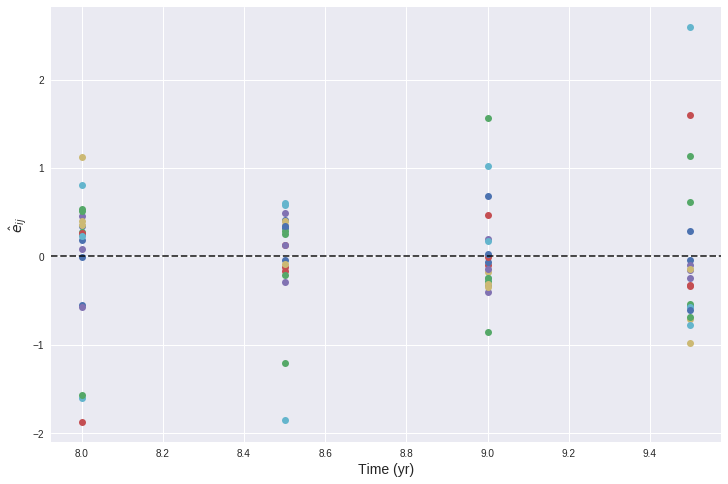

In [14]:
ppc = pm.sample_ppc(trace_1, samples=10000, model=model_1)
y_pred = ppc['y'].T.mean(axis=2)
wc_res = data.T - y_pred
plt.plot(wc_res, 'o')
plt.axhline(0, ls='--', c='k', alpha=.8)
plt.xlabel('Time (yr)')
plt.ylabel(r'$\hat{e}_{ij}$')

The above residuals show that there is a large grouping of kids near 0 with a few outliers on each spot. In general, the model is overestimating the first year and underestimating the second year

### 2.e
Again, I will use Half Cauchy for the conjugate prior of each variance for the normal distributions. 

In [15]:
with pm.Model() as model_2:
    b0 = pm.Normal('b0', 0, 100)
    s0 = pm.HalfCauchy('s0', 100)
    b1 = pm.Normal('b1', 0, 100)
    s1 = pm.HalfCauchy('s1', 100)
    
    b0i = pm.Normal('b0i', b0, s1, shape=(20,1))
    b1i = pm.Normal('b1i', b1, s1, shape=(20,1))
    
    sw = pm.HalfCauchy('sw', 100)
    
    mu = b0i + b1i * ages
    sd = sw
    like = pm.Normal('y', mu=mu, sd=sd, observed=data)

In [16]:
with model_2:
    trace_2 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/opt/conda/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sw_log__, b1i, b0i, s1_log__, b1, s0_log__, b0]
100%|██████████| 2000/2000 [00:21<00:00, 93.78it/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


In [17]:
pprint.pprint(pm.effective_n(trace_2))

{'b0': 96.0,
 'b0i': array([[ 99.],
       [100.],
       [100.],
       [ 99.],
       [ 98.],
       [ 99.],
       [ 99.],
       [ 99.],
       [ 98.],
       [100.],
       [100.],
       [ 99.],
       [100.],
       [100.],
       [100.],
       [ 98.],
       [100.],
       [ 99.],
       [ 98.],
       [ 98.]]),
 'b1': 108.0,
 'b1i': array([[102.],
       [105.],
       [107.],
       [106.],
       [105.],
       [105.],
       [108.],
       [104.],
       [104.],
       [105.],
       [106.],
       [106.],
       [106.],
       [106.],
       [105.],
       [104.],
       [105.],
       [107.],
       [106.],
       [105.]]),
 's0': 1117.0,
 's1': 975.0,
 'sw': 1017.0}


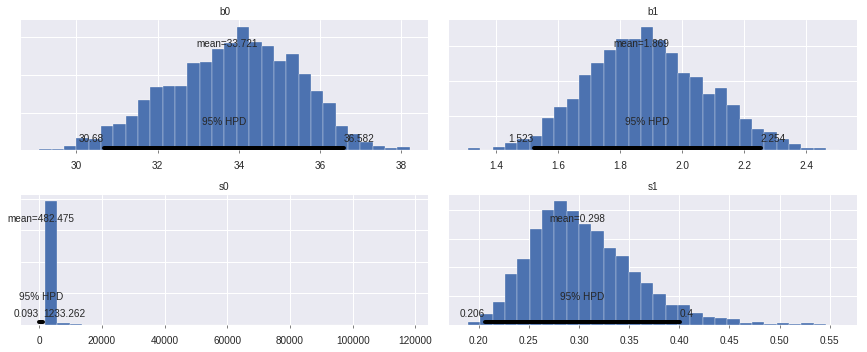

In [18]:
pm.plot_posterior(trace_2, ['b0', 'b1', 's0', 's1']);

In [19]:
growth_rate = trace_2['b1i'].mean(axis=0)
fastest = np.argmax(growth_rate)
print('Fastest growth rate is child {} with rate {} in/yr'.format(fastest, 2*growth_rate[fastest]))

Fastest growth rate is child 17 with rate [4.71302628] in/yr


#### 2.g
I will create a distribution of the samples of growth rate ($\beta_1$) for the first and second child and see if the  value 0 falls within the 95% credible set.

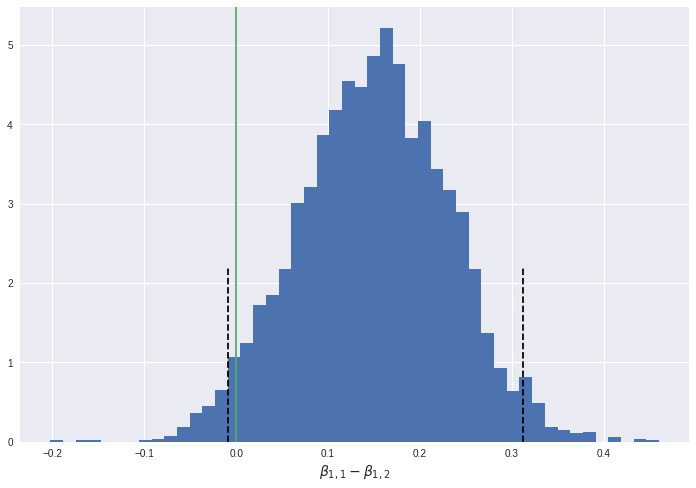

In [20]:
diff = trace_2['b1i'][:, 0, 0] - trace_2['b1i'][:, 1, 0]
plt.hist(diff, bins='auto', normed=True)
p1,p2 = np.percentile(diff, [2.5, 97.5])
plt.axvline(p1, ymax=.4, color='k', ls='--')
plt.axvline(p2, ymax=.4, color='k', ls='--')
plt.axvline(0, ymax=1, color='C1', ls='-')
plt.xlabel(r'$\beta_{1,1} - \beta_{1, 2}$')

There is *technically* no significant difference in growth rates but it is very close. Personally I would lean towards saying there is a difference in growth rates

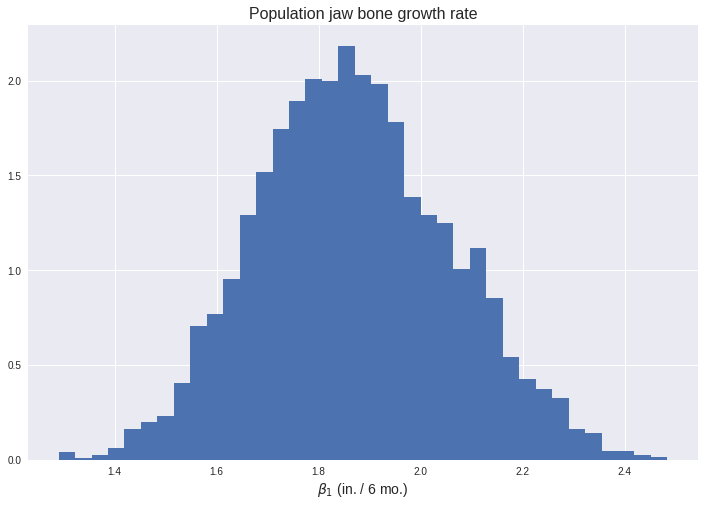

In [21]:
plt.title('Population jaw bone growth rate')
plt.hist(trace_2['b1'], normed=True, bins='auto')
plt.xlabel(r'$\beta_1$ (in. / 6 mo.)');

#### 2.j Differences

The first model can be interpreted as that there is some static difference between each kid but that the starting size and growth rates are equal for every child. The static difference could be considered the difference from the standard starting length.

The second model assumes that each kid has a unique starting length AND growth rate, but that these values can be parameterized in general for a whole population. 

# Question 3

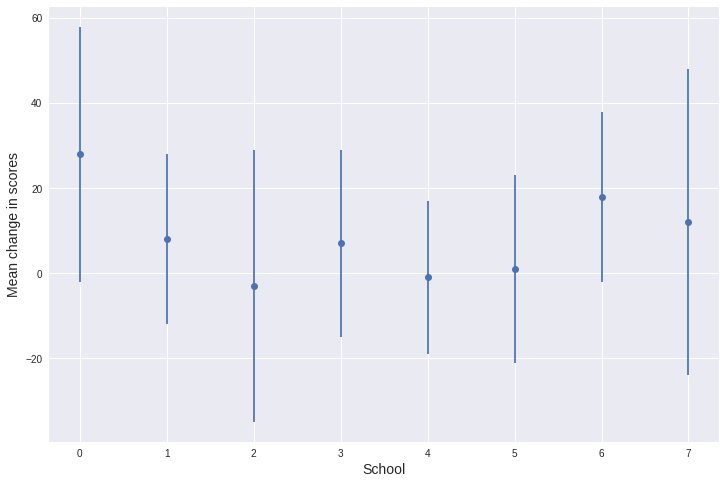

In [22]:
schoolobs = np.array([28, 8, -3, 7, -1, 1, 18, 12])
sigma = np.array([15, 10, 16, 11, 9, 11, 10, 18])
plt.errorbar(range(len(schoolobs)), schoolobs, yerr=2*sigma, fmt='o')
plt.xlabel('School')
plt.ylabel('Mean change in scores');

### Model
I will be taking ideas from this [page](https://docs.pymc.io/notebooks/Diagnosing_biased_Inference_with_Divergences.html) for help on implementation

For this model, I will parameterize the observations with a non-centered but scaled normal distribution of which the mean and variance have hyper-parameteric distributions like so:
$$ \mu \sim N(0,5) $$
$$ \tau \sim \text{Half-Cauchy}(0,5) $$
$$ \tilde{\theta_n} \sim N(0,1)$$
$$ \theta_n = \mu + \tau\cdot\tilde{\theta_n}$$
$$ y_n \sim N(\theta_n, \sigma_n) $$
Where $\sigma_n$ is from the data

I chose to use this non-centered because it helps minimize thet number of divergences in the chains. I am not fully positive of the logic, but the article I linked above showed how it changes the effectiveness of the NUTS sampler for hierarchical models.

In [23]:
with pm.Model() as hierarchical_model:
    mu = pm.Normal('mu', 0, 5)
    tau = pm.HalfCauchy('tau', 5)
    theta_raw = pm.Normal('theta_r', 0, 1, shape=len(schoolobs))
    theta = pm.Deterministic('theta', mu + tau * theta_raw)
    like = pm.Normal('obs', theta, sigma, observed=schoolobs)
    
    htrace = pm.sample(5000, tune=2000, nuts_kwargs={'target_accept':.85})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/opt/conda/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_r, tau_log__, mu]
100%|██████████| 7000/7000 [00:08<00:00, 803.98it/s]
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.


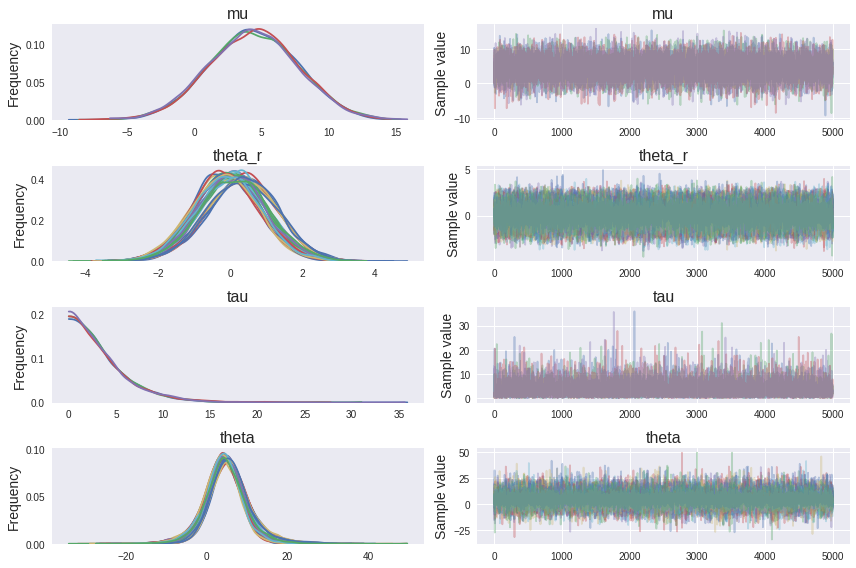

In [24]:
pm.traceplot(htrace);

In [25]:
obs = pm.sample_ppc(htrace, 10000, hierarchical_model)['obs'].T

100%|██████████| 10000/10000 [00:02<00:00, 3688.61it/s]


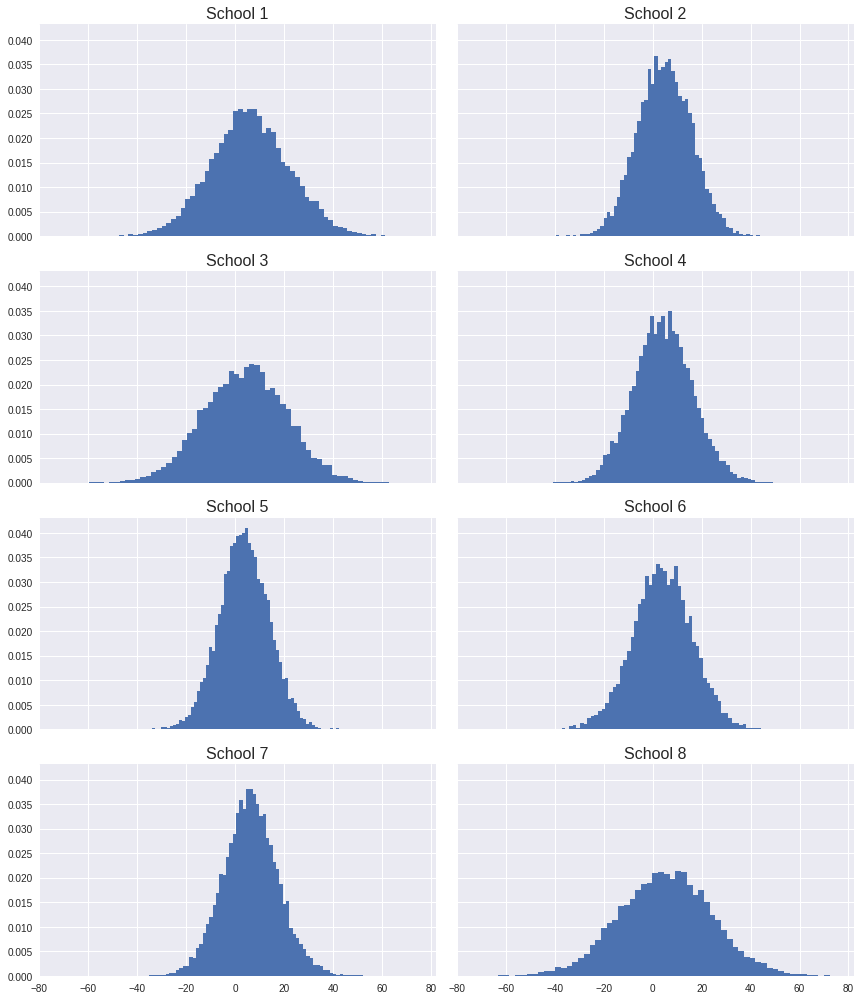

In [26]:
fig, axes = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(12, 14))
for i, data in enumerate(obs):
    ax = axes[int(i / 2), i % 2]
    ax.hist(data, normed=True, bins='auto')
    ax.set_title('School {}'.format(i+1))
    
plt.tight_layout()

From this analysis, if we consider the variance of the effects, there isn't a significant difference in the schools programs, and overall the difference isnt' overwhelmingly large. Most means occer close to 0 with such high variance, albeit generally higher than 0.